1 170.7
2 170.7
3 170.7
4 170.7
5 170.7
6 170.7
7 170.7
8 170.7
9 170.7
10 169.5
11 169.3
12 169.3
13 169.3
14 169.3
15 169.3
16 169.3
17 169.3
18 169.3
19 169.3
20 169.3
21 169.3
22 169.3
23 169.3
24 169.3
25 169.3
26 169.3
27 169.3
28 169.3
29 169.3
30 169.3
31 169.3
32 169.3
33 169.3
34 169.3
35 169.3
36 169.3
37 169.3
38 169.3
39 169.3
40 169.3
41 169.3
42 168.4
43 168.4
44 168.4
45 168.4
46 168.4
47 168.4
48 168.4
49 168.4
50 168.4
51 168.4
52 168.4
53 168.4
54 168.4
55 168.4
56 168.4
57 168.4
58 168.4
59 168.4
60 168.4
61 168.4
62 168.4
63 168.4
64 168.4
65 168.4
66 168.4
67 168.4
68 168.4
69 168.4
70 168.4
71 168.4
72 168.4
73 168.4
74 168.4
75 168.4
76 168.4
77 168.4
78 168.4
79 168.4
80 168.4
81 168.4
82 168.4
83 168.4
84 168.4
85 168.4
86 168.4
87 168.4
88 168.4
89 168.4
90 168.4
91 168.4
92 168.4
93 168.4
94 168.4
95 168.4
96 168.4
97 168.4
98 168.4
99 168.4
100 168.4
101 168.4
102 168.4
103 168.4
104 168.4
105 168.4
106 168.4
107 168.4
108 168.4
109 168.4
110 168.4
111 168.

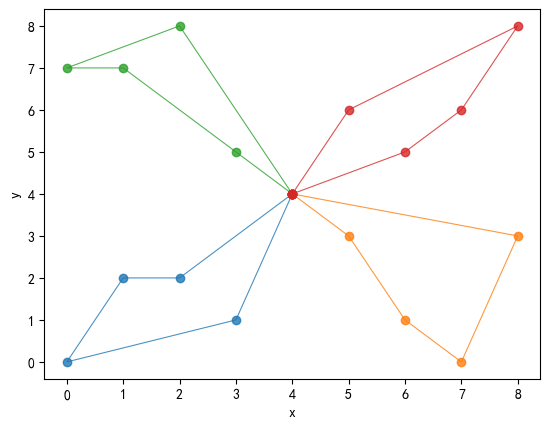

In [2]:
import math
import random
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl

mpl.rcParams['font.sans-serif'] = ['SimHei']  # 添加这条可以让图形显示中文


def calDistance(CityCoordinates):
    '''
    计算城市间距离
    输入：CityCoordinates-城市坐标；
    输出：城市间距离矩阵-dis_matrix
    '''
    dis_matrix = pd.DataFrame(data=None, columns=range(len(CityCoordinates)), index=range(len(CityCoordinates)))
    for i in range(len(CityCoordinates)):
        xi, yi = CityCoordinates[i][0], CityCoordinates[i][1]
        for j in range(len(CityCoordinates)):
            xj, yj = CityCoordinates[j][0], CityCoordinates[j][1]
            dis_matrix.iloc[i, j] = round(math.sqrt((xi - xj) ** 2 + (yi - yj) ** 2), 2)
    return dis_matrix


def greedy(CityCoordinates, dis_matrix):
    '''
    贪婪策略构造初始解,初始化时将VRP简化为TSP进行构造。
    输入：CityCoordinates-节点坐标,dis_matrix-距离矩阵
    输出：初始解-line
    '''
    # 修改dis_matrix以适应求解需要
    dis_matrix = dis_matrix.astype('float64')
    for i in range(len(CityCoordinates)): dis_matrix.loc[i, i] = math.pow(10, 10)
    dis_matrix.loc[:, 0] = math.pow(10, 10)  # 0不在编码内
    line = []  # 初始化
    now_city = random.randint(1, len(CityCoordinates) - 1)  # 随机生成出发城市
    line.append(now_city)  # 添加当前城市到路径
    dis_matrix.loc[:, now_city] = math.pow(10, 10)  # 更新距离矩阵，已经过城市不再被取出
    for i in range(1, len(CityCoordinates) - 1):
        next_city = dis_matrix.loc[now_city, :].idxmin()  # 距离最近的城市
        line.append(next_city)  # 添加进路径
        dis_matrix.loc[:, next_city] = math.pow(10, 10)  # 更新距离矩阵
        now_city = next_city  # 更新当前城市
    return line


def calFitness(birdPop, Demand, dis_matrix, CAPACITY, DISTABCE, C0, C1):
    '''
    贪婪策略分配车辆（解码），计算路径距离（评价函数）
    输入：birdPop-路径，Demand-客户需求,dis_matrix-城市间距离矩阵，CAPACITY-车辆最大载重,DISTABCE-车辆最大行驶距离,C0-车辆启动成本,C1-车辆单位距离行驶成本；
    输出：birdPop_car-分车后路径,fits-适应度
    '''
    birdPop_car, fits = [], []  # 初始化
    for j in range(len(birdPop)):
        bird = birdPop[j]
        lines = []  # 存储线路分车
        line = [0]  # 每辆车服务客户点
        dis_sum = 0  # 线路距离
        dis, d = 0, 0  # 当前客户距离前一个客户的距离、当前客户需求量
        i = 0  # 指向配送中心
        while i < len(bird):
            if line == [0]:  # 车辆未分配客户点
                dis += dis_matrix.loc[0, bird[i]]  # 记录距离
                line.append(bird[i])  # 为客户点分车
                d += Demand[bird[i]]  # 记录需求量
                i += 1  # 指向下一个客户点
            else:  # 已分配客户点则需判断车辆载重和行驶距离
                if (dis_matrix.loc[line[-1], bird[i]] + dis_matrix.loc[bird[i], 0] + dis <= DISTABCE) & (
                        d + Demand[bird[i]] <= CAPACITY):
                    dis += dis_matrix.loc[line[-1], bird[i]]
                    line.append(bird[i])
                    d += Demand[bird[i]]
                    i += 1
                else:
                    dis += dis_matrix.loc[line[-1], 0]  # 当前车辆装满
                    line.append(0)
                    dis_sum += dis
                    lines.append(line)
                    # 下一辆车
                    dis, d = 0, 0
                    line = [0]

        # 最后一辆车
        dis += dis_matrix.loc[line[-1], 0]
        line.append(0)
        dis_sum += dis
        lines.append(line)

        birdPop_car.append(lines)
        fits.append(round(C1 * dis_sum + C0 * len(lines), 1))

    return birdPop_car, fits


def crossover(bird, pLine, gLine, w, c1, c2):
    '''
    采用顺序交叉方式；交叉的parent1为粒子本身，分别以w/(w+c1+c2),c1/(w+c1+c2),c2/(w+c1+c2)
    的概率接受粒子本身逆序、当前最优解、全局最优解作为parent2,只选择其中一个作为parent2；
    输入：bird-粒子,pLine-当前最优解,gLine-全局最优解,w-惯性因子,c1-自我认知因子,c2-社会认知因子；
    输出：交叉后的粒子-croBird；
    '''
    croBird = [None] * len(bird)  # 初始化
    parent1 = bird  # 选择parent1
    # 选择parent2（轮盘赌操作）
    randNum = random.uniform(0, sum([w, c1, c2]))
    if randNum <= w:
        parent2 = [bird[i] for i in range(len(bird) - 1, -1, -1)]  # bird的逆序
    elif randNum <= w + c1:
        parent2 = pLine
    else:
        parent2 = gLine

    # parent1-> croBird
    start_pos = random.randint(0, len(parent1) - 1)
    end_pos = random.randint(0, len(parent1) - 1)
    if start_pos > end_pos: start_pos, end_pos = end_pos, start_pos
    croBird[start_pos:end_pos + 1] = parent1[start_pos:end_pos + 1].copy()

    # parent2 -> croBird
    list2 = list(range(0, start_pos))
    list1 = list(range(end_pos + 1, len(parent2)))
    list_index = list1 + list2  # croBird从后往前填充
    j = -1
    for i in list_index:
        for j in range(j + 1, len(parent2) + 1):
            if parent2[j] not in croBird:
                croBird[i] = parent2[j]
                break

    return croBird


def draw_path(car_routes, CityCoordinates):
    '''
    #画路径图
    输入：line-路径，CityCoordinates-城市坐标；
    输出：路径图
    '''
    for route in car_routes:
        x, y = [], []
        for i in route:
            Coordinate = CityCoordinates[i]
            x.append(Coordinate[0])
            y.append(Coordinate[1])
        x.append(x[0])
        y.append(y[0])
        plt.plot(x, y, 'o-', alpha=0.8, linewidth=0.8)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


if __name__ == '__main__':
    # 车辆参数
    CAPACITY = 15  # 车辆最大容量
    DISTABCE = 250  # 车辆最大行驶距离
    C0 = 30  # 车辆启动成本
    C1 = 1  # 车辆单位距离行驶成本

    # PSO参数
    birdNum = 50  # 粒子数量
    w = 0.2  # 惯性因子
    c1 = 0.4  # 自我认知因子
    c2 = 0.4  # 社会认知因子
    pBest, pLine = 0, []  # 当前最优值、当前最优解，（自我认知部分）
    gBest, gLine = 0, []  # 全局最优值、全局最优解，（社会认知部分）

    # 其他参数
    iterMax = 1000  # 迭代次数
    iterI = 1  # 当前迭代次数
    bestfit = []  # 记录每代最优值

    # 读入数据,
    # DistributionCenter = #配送中心
    Customer =[(4,4),(2,8),(8,8),(0,7),(1,7),(5,6),(7,6),(3,5),(6,5),(5,3),(8,3),(1,2),(2,2),(3,1),(6,1),(0,0),(7,0)]
    Demand =  [0,1,1,2,4,2,4,8,8,1,2,1,2,4,4,8,8]
    dis_matrix = calDistance(Customer)  # 计算城市间距离

    birdPop = [greedy(Customer, dis_matrix) for i in range(birdNum)]  # 贪婪算法构造初始解
    # birdPop = [random.sample(range(1,len(Customer)),len(Customer)-1) for i in range(birdNum)]#客户点编码，随机初始化生成种群

    birdPop_car, fits = calFitness(birdPop, Demand, dis_matrix, CAPACITY, DISTABCE, C0, C1)  # 分配车辆，计算种群适应度

    gBest = pBest = min(fits)  # 全局最优值、当前最优值
    gLine = pLine = birdPop[fits.index(min(fits))]  # 全局最优解、当前最优解
    gLine_car = pLine_car = birdPop_car[fits.index(min(fits))]
    bestfit.append(gBest)

    while iterI <= iterMax:  # 迭代开始
        for i in range(birdNum):
            birdPop[i] = crossover(birdPop[i], pLine, gLine, w, c1, c2)

        birdPop_car, fits = calFitness(birdPop, Demand, dis_matrix, CAPACITY, DISTABCE, C0, C1)  # 分配车辆，计算种群适应度
        pBest, pLine, pLine_car = min(fits), birdPop[fits.index(min(fits))], birdPop_car[fits.index(min(fits))]
        if min(fits) <= gBest:
            gBest, gLine, gLine_car = min(fits), birdPop[fits.index(min(fits))], birdPop_car[fits.index(min(fits))]

        bestfit.append(gBest)
        print(iterI, gBest)  # 打印当前代数和最佳适应度值
        iterI += 1  # 迭代计数加一

    print(gLine_car)  # 路径顺序
    draw_path(gLine_car, Customer)  # 画路径图
